MACRO
==================
```
options mprint; # GOOD FOR MACRO DEBUG
%macro reports;
%daily%if &sysday=Friday %then %weekly;
%mend reports;

%IF %THEN conditionally process a portion of the macro.
%DO %END begins and ends a DO group that uses multiple statements.
%PUT writes text or macro variable information to the log.
%RETURN Execution causes normal termination of the currently executing macro.
```


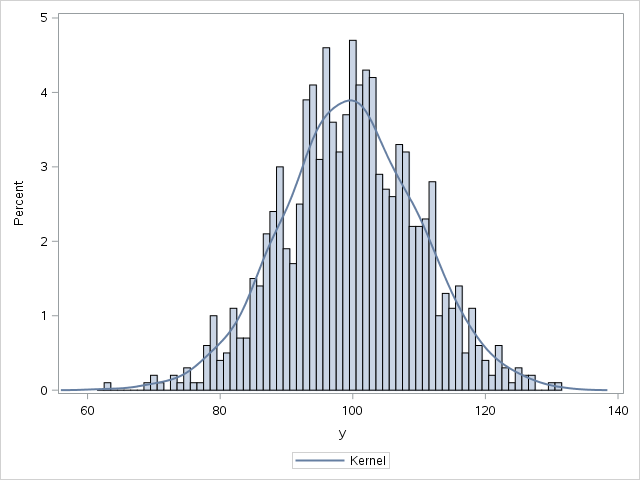

In [6]:
/*--------------------------------------------------*/
/* SAS Programming for R Users - code for exercises */
/* Copyright 2016 SAS Institute Inc.                */
/*--------------------------------------------------*/

/*SP4R05d05*/

/*Part A*/
%macro mymac(dist,param1,param2=,n=100,stats=no,plot=no);

/*Part B*/
%if &dist= %then %do;
   %put Dist is a required argument;
   %return;
%end;

%if &param1= %then %do;
   %put Param1 is a required argument;
   %return;
%end;

/*Part C*/
%if &param2= %then %do;
   data random (drop=i);
      do i=1 to &n;
         y=rand("&dist",&param1);
	     x+1;
	     output;
      end;
   run;
%end;

%else %do;
   data random (drop=i);
      do i=1 to &n;
         y=rand("&dist",&param1,&param2);
	     x+1;
	     output;
      end;
   run;
%end;

/*Part D*/
%if %upcase(&stats)=YES %then %do;
   proc means data=random mean std;
      var y;
   run;
%end;

/*Part E*/
%if %upcase(&plot)=YES %then %do;
   proc sgplot data=random;
      histogram y / binwidth=1;
	  density y / type=kernel;
   run;
%end;

%mend;

/*Part F*/
%mymac(param1=0.2,stats=yes)

/*Part G*/
%mymac(dist=Geometric,param1=0.2,param2=,stats=yes)

/*Part H*/
options mprint;
%mymac(dist=Normal,param1=100,param2=10,n=1000,plot=yes)


In [16]:
%let path = /folders/myfolders/sas-prog-for-r-users/data;
libname sp4r "&path";
/*--------------------------------------------------*/
/* SAS Programming for R Users - code for exercises */
/* Copyright 2016 SAS Institute Inc.                */
/*--------------------------------------------------*/

/*SP4R05d06*/

%macro myappend(start,stop);
   %do year=&start %to &stop;
      proc import datafile="&path/sales_&year..csv" out=sp4r.sales_&year dbms=csv replace;
      run;

      proc append base=sp4r.sales_all data=sp4r.sales_&year;
      run;

      proc datasets library=sp4r noprint;
         delete sales_&year;
      quit;
   %end;
%mend;

options nomprint; * mprint GOOD FOR MACRO DEBUG; 
%myappend(2000,2009)

/*Why did we use a double period to specify the DATAFILE above?*/
%let mypath = /folders/myfolders/sas-prog-for-r-users/data/;
%put &mypathmydata.csv;
%put &mypath.mydata.csv;

%let mydata = sales_data;
%put &mydata.csv;
%put &mydata..csv;


SYMPUTX subroutine enables you to create a macro variable inside a DATA step.
==============
A macro variable created inside a macro program is local in scope. For example, vars_cont and vars_cat can be referenced only inside the macro program. To create a global macro variable, you must use the SYMPUTX subroutine. The third argument enables the user to specify a global option for the macro variable that is being created. View the SAS online documentation for a complete description.

CALL SYMPUT Routine
------------------
Assigns DATA step information to a macro variable.

In [13]:
/*--------------------------------------------------*/
/* SAS Programming for R Users - code for exercises */
/* Copyright 2016 SAS Institute Inc.                */
/*--------------------------------------------------*/

/*SP4R05e03*/

data _NULL_;
   x=-3;
   df=5;
   p=(1-probt(abs(x),df))*2;
   call symputx('sig_level',p);
run;

%put The significance level for the two-tailed t test is &sig_level;


User Defined Paremter
========================

In [5]:
DATA HTWT;                  
   INPUT SUBJECT GENDER $ HEIGHT WEIGHT; 
DATALINES;  
1 M 68.5 155
2 F 61.2  99
3 F 63.0 115
4 M 70.0 205
5 M 68.6 170
6 F 65.1 125
7 M 72.4 220
;



* option 1: macro quote the apostrophe ;
%let q=%str(%');
%let name=M;


data test;
   set HTWT;
   where GENDER=%unquote(&q&name&q);
run;

PROC PRINT;
RUN;

Obs,SUBJECT,GENDER,HEIGHT,WEIGHT
1,1,M,68.5,155
2,4,M,70.0,205
3,5,M,68.6,170
4,7,M,72.4,220


read into macro variable
==========================

Tree Structure 
-------------------